In [1]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df_oct = pd.read_csv('COVID_Cases_Restricted_Detailed_10312020.csv')

In [97]:
df_oct.head(3)

,race_ethnicity_combined,current_status,cdc_report_dt,sex,onset_dt,pos_spec_dt,hosp_yn,icu_yn,death_yn,hc_work_yn,...,sob_yn,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,county_fips_code,res_county,res_state,age_group
0,"White, Non-Hispanic",Laboratory-confirmed case,2020-10-01,Male,2020-08-26,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,31001.00,ADAMS,NE,10 - 19 Years
1,"White, Non-Hispanic",Laboratory-confirmed case,2020-08-23,Male,2020-07-07,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,31001.00,ADAMS,NE,10 - 19 Years
2,"White, Non-Hispanic",Laboratory-confirmed case,2020-10-01,Male,2020-09-02,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,31001.00,ADAMS,NE,10 - 19 Years


In [98]:
df_oct['race_ethnicity_combined'].value_counts()

Unknown                                                 2288379
White, Non-Hispanic                                     1529876
Hispanic/Latino                                          892783
Black, Non-Hispanic                                      556066
Multiple/Other, Non-Hispanic                             144115
Asian, Non-Hispanic                                       87184
American Indian/Alaska Native, Non-Hispanic               32623
Native Hawaiian/Other Pacific Islander, Non-Hispanic       7787
Name: race_ethnicity_combined, dtype: int64

In [99]:
df_oct['death_yn'].value_counts()

No         2662955
Missing    2321809
Unknown     617047
Yes         158255
Name: death_yn, dtype: int64

In [100]:
df_dYes = df_oct[df_oct.death_yn == 'Yes']

In [101]:
df_dYes['death_yn'].value_counts()

Yes    158255
Name: death_yn, dtype: int64

In [102]:
df_dYes = df_dYes[['death_yn','race_ethnicity_combined']].groupby('race_ethnicity_combined').count()
df_dYes

,death_yn
race_ethnicity_combined,
"American Indian/Alaska Native, Non-Hispanic",850
"Asian, Non-Hispanic",4899
"Black, Non-Hispanic",26169
Hispanic/Latino,20951
"Multiple/Other, Non-Hispanic",4987
"Native Hawaiian/Other Pacific Islander, Non-Hispanic",117
Unknown,22728
"White, Non-Hispanic",71235


In [103]:
df_dYes.to_csv('Covid Deaths by ethnicity YTD Oct.csv')

In [104]:
df_oct_deaths = pd.read_csv('Deaths by ethnicity.csv')
df_oct_deaths = df_oct_deaths.drop(df_oct_deaths.index[6])
df_oct_deaths

,race_ethnicity_combined,death_yn
0,"American Indian/Alaska Native, Non-Hispanic",850
1,"Asian, Non-Hispanic",4899
2,"Black, Non-Hispanic",26169
3,Hispanic/Latino,20951
4,"Multiple/Other, Non-Hispanic",4987
5,"Native Hawaiian/Other Pacific Islander, Non-Hi...",117
7,"White, Non-Hispanic",71235


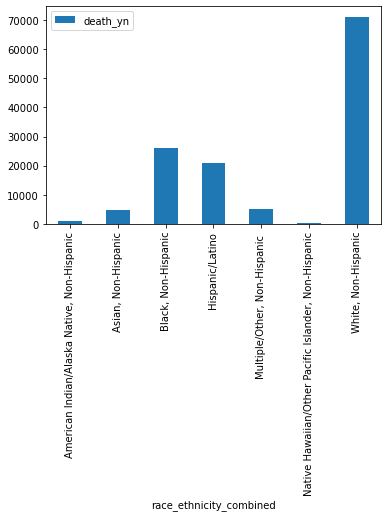

In [105]:
df_oct_deaths.plot(kind='bar',x='race_ethnicity_combined',y='death_yn')

In [106]:
sum_row = df_oct_deaths[['death_yn']].sum()
df_sum = pd.DataFrame(data=sum_row).T
df_sum=df_sum.reindex(columns=df_oct_deaths.columns)
df_sum

,race_ethnicity_combined,death_yn
0,nan,129208


In [107]:
df_oct_deaths = df_oct_deaths.append(df_sum,ignore_index=True)
df_oct_deaths

,race_ethnicity_combined,death_yn
0,"American Indian/Alaska Native, Non-Hispanic",850
1,"Asian, Non-Hispanic",4899
2,"Black, Non-Hispanic",26169
3,Hispanic/Latino,20951
4,"Multiple/Other, Non-Hispanic",4987
5,"Native Hawaiian/Other Pacific Islander, Non-Hi...",117
6,"White, Non-Hispanic",71235
7,NaN,129208


In [108]:
df_oct_deaths['deaths in % of total'] = df_oct_deaths.death_yn / df_oct_deaths.death_yn[7] *100
pd.options.display.float_format = '{:.2f}'.format
df_oct_deaths

,race_ethnicity_combined,death_yn,deaths in % of total
0,"American Indian/Alaska Native, Non-Hispanic",850,0.66
1,"Asian, Non-Hispanic",4899,3.79
2,"Black, Non-Hispanic",26169,20.25
3,Hispanic/Latino,20951,16.21
4,"Multiple/Other, Non-Hispanic",4987,3.86
5,"Native Hawaiian/Other Pacific Islander, Non-Hi...",117,0.09
6,"White, Non-Hispanic",71235,55.13
7,NaN,129208,100.00


###US Total population breakdown from census.gov:
https://www.census.gov/quickfacts/fact/table/US/PST045219

In [109]:
df_oct_deaths['% total US population'] = [1.3, 5.9, 13.4, 18.5, 2.8, 0.2, 60.1, 100.0]
df_oct_deaths['Delta %P Covid deaths to total population'] = df_oct_deaths["deaths in % of total"] - df_oct_deaths["% total US population"]
df_oct_deaths

,race_ethnicity_combined,death_yn,deaths in % of total,% total US population,Delta %P Covid deaths to total population
0,"American Indian/Alaska Native, Non-Hispanic",850,0.66,1.30,-0.64
1,"Asian, Non-Hispanic",4899,3.79,5.90,-2.11
2,"Black, Non-Hispanic",26169,20.25,13.40,6.85
3,Hispanic/Latino,20951,16.21,18.50,-2.29
4,"Multiple/Other, Non-Hispanic",4987,3.86,2.80,1.06
5,"Native Hawaiian/Other Pacific Islander, Non-Hi...",117,0.09,0.20,-0.11
6,"White, Non-Hispanic",71235,55.13,60.10,-4.97
7,NaN,129208,100.00,100.00,0.00
